In [2]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt


In [53]:
#reading in stock price data for the last five years (courtesy of yahoo finance), the stocks I have chosen are Advanced Micro Electronics (electronics industry), 
#Regeneron (Pharmaceutical/healthcare industry), Costco (wholesaler), Netflix (entertainment), and Google(technology)
AMD_df=pd.read_csv("AMD (1).csv")
REGN_df=pd.read_csv("REGN (1).csv")
COST_df=pd.read_csv("COST (1).csv")
NFLX_df=pd.read_csv("NFLX.csv")
GOOG_df=pd.read_csv("GOOG.csv")


            Date        Open        High         Low       Close   Adj Close  \
0     2015-10-12  153.970001  154.479996  153.089996  153.630005  140.110886   
1     2015-10-13  153.229996  154.070007  152.220001  152.279999  138.879639   
2     2015-10-14  152.309998  152.770004  149.100006  149.839996  136.654373   
3     2015-10-15  150.830002  151.899994  150.220001  151.770004  138.414581   
4     2015-10-16  152.320007  152.970001  151.279999  152.059998  138.679001   
...          ...         ...         ...         ...         ...         ...   
1254  2020-10-05  355.329987  358.980011  355.329987  358.579987  358.579987   
1255  2020-10-06  361.899994  363.000000  357.040009  358.350006  358.350006   
1256  2020-10-07  360.470001  364.739990  359.660004  363.019989  363.019989   
1257  2020-10-08  364.799988  365.970001  361.750000  365.089996  365.089996   
1258  2020-10-09  366.000000  369.750000  365.700012  369.459991  369.459991   

       Volume  
0     1200100  
1     1

In [176]:
#reading in data from the last five years of Dow Jones numbers (also from yahoo finance)
DJ_df=pd.read_csv("YM=F.csv")

#building overall dataframe starting with Dow jones information
DJ_X=DJ_df[["Open","High","Low","Close","Volume"]]

#add stock name to column title
#rename column to fit the form "AMD_Open, REGN_Close, etc for all columns"
DJ_X.rename(columns={"Open":"DJ_Open","High":"DJ_High", "Low":"DJ_Low","Close":"DJ_Close","Volume":"DJ_Volume"})    

#DJ_X has many null rows so we will remove these 
DJ_X=DJ_X.dropna()
print(DJ_X)

#AMD info
AMD_X=AMD_df[["Open","High","Low","Close","Volume"]]
data=['AMD']*len(AMD_X)
AMD_X.insert(0,"Company",data)

#y data for AMD will be growth in 1 year
AMD_y = np.zeros(len(AMD_X)-252)
for i in range(len(AMD_X) - 252):
    initial=AMD_X["Close"][i]
    #~252 closing prices per year on this dataframe
    one_year=AMD_X["Close"][i+252]
    AMD_y[i]=(one_year-initial)/initial

y=pd.DataFrame(AMD_y)
print(AMD_y)
               
#AMD_X=AMD_X.rename(columns={"Open":"AMD_Open","High":"AMD_High", "Low":"AMD_Low","Close":"AMD_Close","Volume":"AMD_Volume"})    


print(GOOG_X)


#regeneron info
REGN_X=REGN_df[["Open","High","Low","Close","Volume"]]
data=['REGN']*len(REGN_X)
REGN_X.insert(0,"Company",data)
#calculate growth y in a year

#y data for REGN will be growth in 1 year
REGN_y = np.zeros(len(REGN_X)-252)
for i in range(len(AMD_X) - 252):
    initial=REGN_X["Close"][i]
    #~252 closing prices per year on this dataframe
    one_year=REGN_X["Close"][i+252]
    REGN_y[i]=(one_year-initial)/initial

y = pd.concat([y,pd.DataFrame(AMD_y)],axis=0)

#Costco info
COST_X=COST_df[["Open","High","Low","Close","Volume"]]
data=['COST']*len(COST_X)
COST_X.insert(0,"Company",data)

COST_y = np.zeros(len(COST_X)-252)
for i in range(len(COST_X) - 252):
    initial=COST_X["Close"][i]
    #~252 closing prices per year on this dataframe
    one_year=COST_X["Close"][i+252]
    COST_y[i]=(one_year-initial)/initial

y = pd.concat([y,pd.DataFrame(COST_y)],axis=0)

#Netflix info
NFLX_X=NFLX_df[["Open","High","Low","Close","Volume"]]
data=['NFLX']*len(AMD_X)
NFLX_X.insert(0,"Company",data)

NFLX_y = np.zeros(len(REGN_X)-252)
for i in range(len(AMD_X) - 252):
    initial=NFLX_X["Close"][i]
    #~252 closing prices per year on this dataframe
    one_year=NFLX_X["Close"][i+252]
    NFLX_y[i]=(one_year-initial)/initial

y = pd.concat([y,pd.DataFrame(NFLX_y)],axis=0)

#Google info
GOOG_X=GOOG_df[["Open","High","Low","Close","Volume"]]
data=['GOOG']*len(GOOG_X)
GOOG_X.insert(0,"Company",data)

GOOG_y = np.zeros(len(GOOG_X)-252)
for i in range(len(GOOG_X) - 252):
    initial=GOOG_X["Close"][i]
    #~252 closing prices per year on this dataframe
    one_year=GOOG_X["Close"][i+252]
    GOOG_y[i]=(one_year-initial)/initial

#final X, y dataframes    
y = pd.concat([y,pd.DataFrame(GOOG_y)],axis=0)
y = y.reset_index(drop=True)
print(y)

X=pd.concat([AMD_X.iloc[:1007,:],REGN_X.iloc[:1007,:],COST_X.iloc[:1007,:],NFLX_X.iloc[:1007,:],GOOG_X.iloc[:1007,:]],axis=0)
X=X.reset_index(drop=True)
print(X)

#creating csv with full dataframe
full_df=pd.concat([X,y],axis=1)
full_df.to_csv('data.csv')


         Open     High      Low    Close    Volume
0     16972.0  17099.0  16943.0  17040.0   67274.0
1     17051.0  17076.0  16920.0  16973.0  128107.0
2     16951.0  17017.0  16793.0  16822.0  163381.0
3     16826.0  17072.0  16825.0  17069.0  152438.0
4     17062.0  17126.0  17012.0  17115.0  108094.0
...       ...      ...      ...      ...       ...
1514  27740.0  28042.0  27646.0  27995.0  169813.0
1515  28010.0  28232.0  27531.0  27700.0  287020.0
1516  27568.0  28250.0  27539.0  28179.0  193674.0
1517  28179.0  28452.0  28151.0  28310.0  179037.0
1518  28378.0  28570.0  28324.0  28518.0  179037.0

[1281 rows x 5 columns]
[2.47593583 2.44791667 2.32820513 ... 2.07084669 2.03970503 1.92811843]
     Company         Open         High          Low        Close   Volume
0       GOOG   642.090027   648.500000   639.010010   646.669983  1275200
1       GOOG   643.150024   657.812012   643.150024   652.299988  1807700
2       GOOG   653.210022   659.390015   648.849976   651.159973  141

Text(0.5, 1.0, 'Netflix and Google Share Price Relationship')

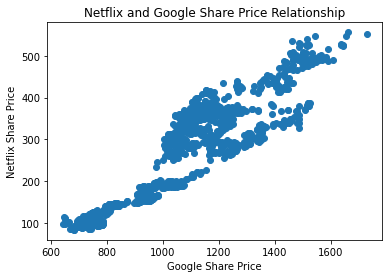

In [147]:
#EDA: make lots of pretty graphs
plt.scatter(GOOG_X["Close"],NFLX_X["Close"])
plt.xlabel("Google Share Price")
plt.ylabel("Netflix Share Price")
plt.title("Netflix and Google Share Price Relationship")

Text(0.5, 1.0, 'Google and Regeneron Share Price Relationship')

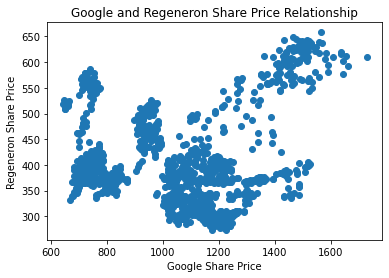

In [148]:
plt.scatter(GOOG_X["Close"],REGN_X["Close"])
plt.xlabel("Google Share Price")
plt.ylabel("Regeneron Share Price")
plt.title("Google and Regeneron Share Price Relationship")

Text(0.5, 1.0, 'Coscto/Regeron Share Price Relationship')

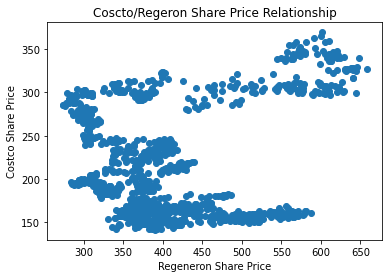

In [149]:
plt.scatter(REGN_X["Close"], COST_X["Close"])
plt.ylabel("Costco Share Price")
plt.xlabel("Regeneron Share Price")
plt.title("Coscto/Regeron Share Price Relationship")

Text(0.5, 1.0, "Regeneron and Costco's Closing Share Prices Histogram")

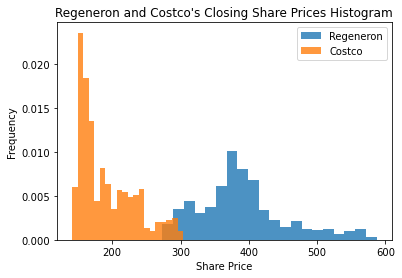

In [151]:
plt.hist(X[X["Company"]=="REGN"]["Close"],label = "Regeneron",bins=20,density=True, stacked=False,alpha=0.8)
plt.hist(X[X["Company"]=="COST"]["Close"],label = "Costco",bins=20,density=True, stacked=False,alpha=0.8)
plt.legend()
plt.ylabel("Frequency")
plt.xlabel("Share Price")
plt.title("Regeneron and Costco's Closing Share Prices Histogram")

In [127]:
np.array(X["Company"])

array(['AMD', 'AMD', 'AMD', ..., 'GOOG', 'GOOG', 'GOOG'], dtype=object)

In [167]:
#Data Preprocessing:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import OneHotEncoder,StandardScaler

#first apply standard scaler to continuous variabels in X, which is all except for the company column
#Then apply one hot encoder to company column

scaler=StandardScaler()
enc=OneHotEncoder(sparse=False)

spl=TimeSeriesSplit()
for train, other in spl.split(X):
    X_train, X_other = X[train], X[other]
    y_train, y_other = y[train], y[other]

for val, test in spl.split(X_other):
    X_val, X_test = X[val], X[test]
    y_val, y_test = y[val], y[test]

#using standardscaler on continuous variable columns
X_train_scale = scaler.fit_transform(X_train[:,1:])
X_test_scale = scaler.transform(X_test[:,1:])
X_val_scale = scaler.transform(X_val[:,1:])

#using one-hot encoder on categorical variable company, only apply for to training data:
enc.fit([X_train[:,0]])
X_train_ohe = enc.fit_transform([X_train[:,0]])

X_val_ohe = enc.transform([X_val[:,0]])
X_test_ohe = enc.transform([X_test[:,0]])





ValueError: The number of features in X is different to the number of features of the fitted data. The fitted data had 4196 features and the X has 700 features.

array([['AMD', 1.96, 1.96, 1.85, 1.87, 7686600],
       ['AMD', 1.87, 1.94, 1.86, 1.92, 6698400],
       ['AMD', 1.92, 1.96, 1.92, 1.95, 10184300],
       ...,
       ['GOOG', 723.960022, 728.570007, 720.580017, 728.280029, 1583700],
       ['GOOG', 722.869995, 729.539978, 722.335999, 728.580017, 988900],
       ['GOOG', 719.469971, 725.8900150000001, 716.429993, 719.409973,
        1216400]], dtype=object)